In [1]:
import random
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


### Exercitiul 1:

We consider an urn containing 3 red balls, 4 blue balls, and 2 black balls. We roll a die; if we get a prime
number, we add a black ball to the urn, if we get a 6, we add a red ball, and in all other cases, we add a blue ball. Then
we draw one ball from the urn.

a) (0.5p) Simulate the above experiment in Python.

b) (0.5p) Using the simulation, estimate the probability of drawing a red ball.

c) Bonus. (0.5p) Calculate the theoretical probability of the above event and compare it with the estimated one.

R -> 3

B -> 4

N -> 2 

E1: "Roll die and add a ball" ; E2: "Choose a ball."

P(E1|R) = 1/6 ; P(E1|B) = 3/6 ; P(E1|N) = 2/6



In [18]:

def experiment():
    urn = {'red': 3, 'blue': 4, 'black': 2}
    die_roll = random.randint(1, 6)
    if die_roll in [2, 3, 5]:
        urn['black'] += 1
    elif die_roll == 6:
        urn['red'] += 1
    else:
        urn['blue'] += 1
    balls = []
    for color, count in urn.items():
        balls.extend([color] * count)
    drawn_ball = random.choice(balls)
    return drawn_ball

n_simulations = 100000
red_count = sum(1 for _ in range(n_simulations) if experiment() == 'red')
estimated_prob = red_count / n_simulations
print(f"Estimated probability of drawing a red ball: {estimated_prob:.4f}")

Estimated probability of drawing a red ball: 0.3170


### Exercitiul 2

A call center receives incoming calls that follow a Poisson process. Depending on the day, the average number
of calls per hour varies due to factors such as promotions, holidays, or technical issues. The average rate is typically
one of the following values:

𝜆 ∈ {1, 2, 5, 10}

1. (0.5p) Simulate 1,000 values from each of the following Poisson distributions with fixed parameters:
𝑋1 ∼ Poisson(1), 𝑋2 ∼ Poisson(2), 𝑋3 ∼ Poisson(5), 𝑋4 ∼ Poisson(10)

2. (0.5p) Simulate 1,000 values from a randomized Poisson distribution, where for each value:
● a parameter 𝜆 is randomly selected from the set {1, 2, 5, 10} with equal probability.
● a Poisson random variable is generated using that 𝜆.

a) (0.5p) Plot the histograms or empirical density plots of all five datasets (the four fixed-parameter distributions
and the randomized one).

b) (0.5p) Compare and discuss:
● How does the shape of the randomized distribution differ from the fixed ones?
● What does this tell you about the effect of parameter uncertainty or variability in modeling real-world
processes?

c) Bonus. (0.5p) Try changing the probabilities of selecting each 𝜆 (e.g., make 𝜆 = 5 more likely) and observe how
the distribution changes.

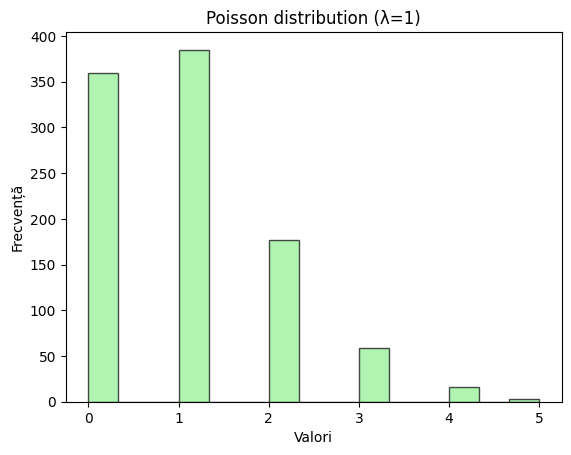

In [11]:
np.random.seed(12)

l = {1,2,5,10}

X1 = np.random.poisson(lam=1, size=1000)
X2 = np.random.poisson(lam=2, size=1000)
X3 = np.random.poisson(lam=5, size=1000)
X4 = np.random.poisson(lam=10, size=1000)

random_lambdas = np.random.choice(list(l), size=1000)
X_rand = np.random.poisson(lam=random_lambdas)

plt.hist(X1, bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Poisson distribution (λ=1)')
plt.xlabel('Valori')
plt.ylabel('Frecvență')
plt.show()

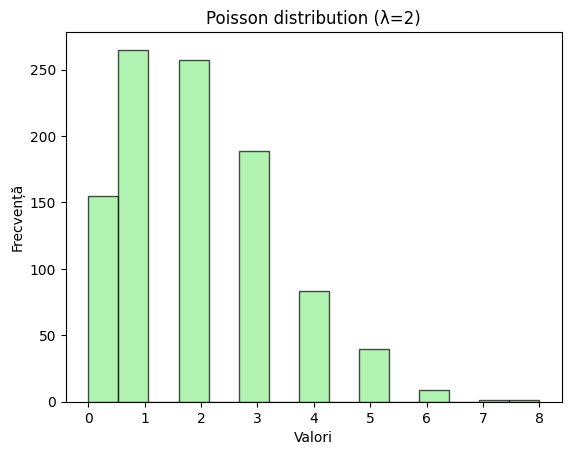

In [12]:
plt.hist(X2, bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Poisson distribution (λ=2)')
plt.xlabel('Valori')
plt.ylabel('Frecvență')
plt.show()

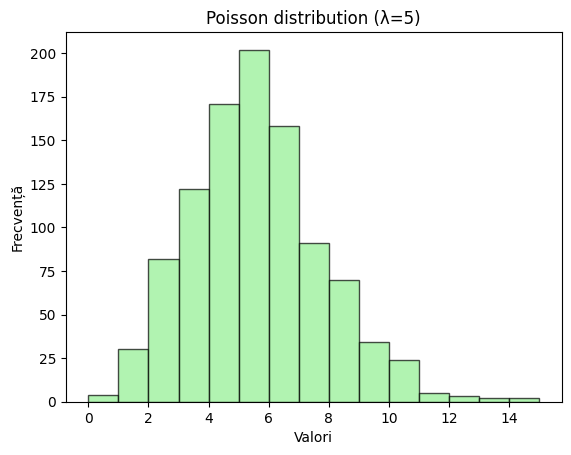

In [14]:
plt.hist(X3, bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Poisson distribution (λ=5)')
plt.xlabel('Valori')
plt.ylabel('Frecvență')
plt.show()

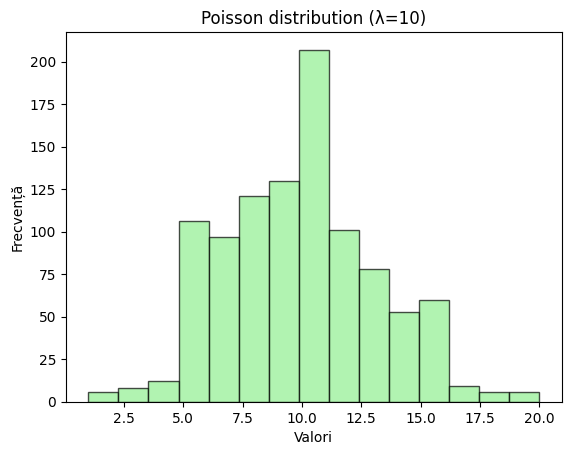

In [15]:
plt.hist(X4, bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Poisson distribution (λ=10)')
plt.xlabel('Valori')
plt.ylabel('Frecvență')
plt.show()

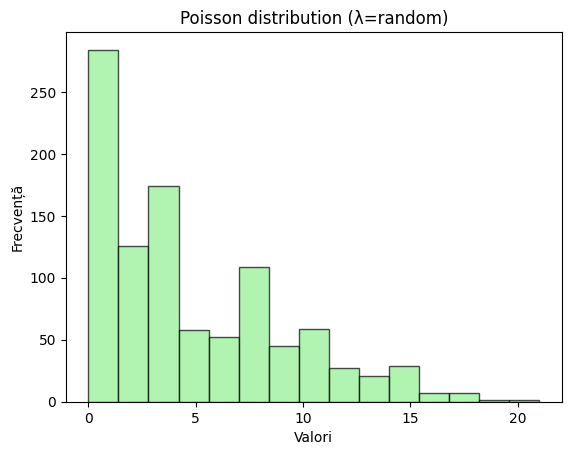

In [16]:
plt.hist(X_rand, bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Poisson distribution (λ=random)')
plt.xlabel('Valori')
plt.ylabel('Frecvență')
plt.show()

b) Se observa faptul ca valorile care apar la mai multe valori lambda au o frecventa mai mare. 

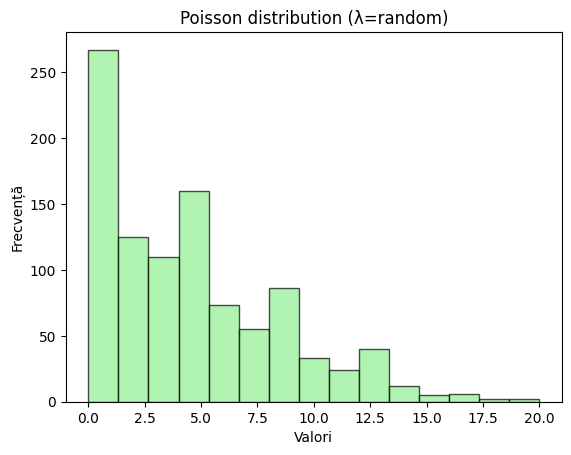

In [24]:
random_lambdas = np.random.choice(list(l), size=900)
random_lambdas = np.concatenate([random_lambdas, np.full(100, 5)])
X_rand = np.random.poisson(lam=random_lambdas)
plt.hist(X_rand, bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Poisson distribution (λ=random)')
plt.xlabel('Valori')
plt.ylabel('Frecvență')
plt.show()

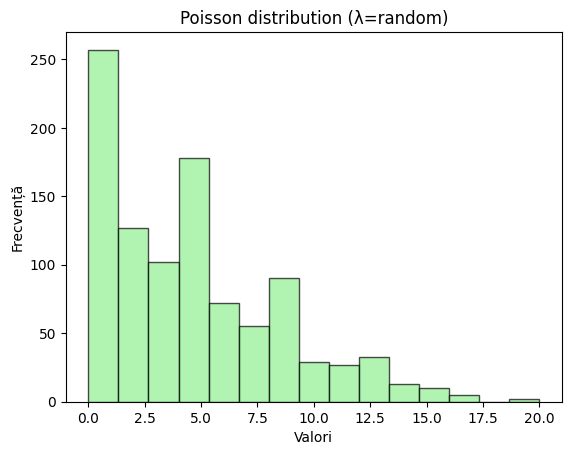

In [25]:
random_lambdas = np.random.choice(list(l), size=800)
random_lambdas = np.concatenate([random_lambdas, np.full(200, 5)])
X_rand = np.random.poisson(lam=random_lambdas)
plt.hist(X_rand, bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Poisson distribution (λ=random)')
plt.xlabel('Valori')
plt.ylabel('Frecvență')
plt.show()

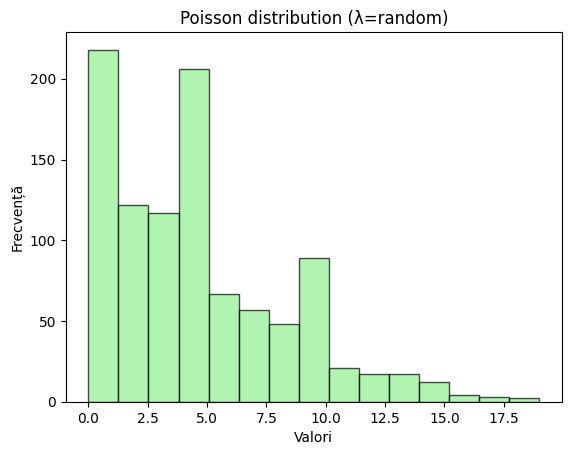

In [26]:
random_lambdas = np.random.choice(list(l), size=700)
random_lambdas = np.concatenate([random_lambdas, np.full(300, 5)])
X_rand = np.random.poisson(lam=random_lambdas)
plt.hist(X_rand, bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Poisson distribution (λ=random)')
plt.xlabel('Valori')
plt.ylabel('Frecvență')
plt.show()

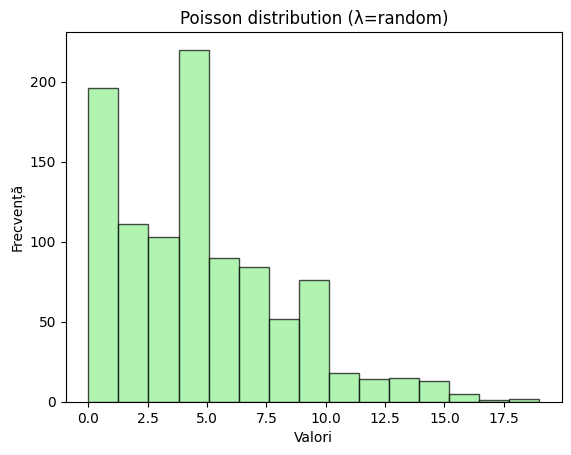

In [27]:
random_lambdas = np.random.choice(list(l), size=600)
random_lambdas = np.concatenate([random_lambdas, np.full(400, 5)])
X_rand = np.random.poisson(lam=random_lambdas)
plt.hist(X_rand, bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Poisson distribution (λ=random)')
plt.xlabel('Valori')
plt.ylabel('Frecvență')
plt.show()

c) Observam ca atunci cand marim probabilitatea de a fi ales de exp lambda = 5, creste frecventa valorilor ce apar in distributia poisson a acestui lambda, in functie de frecventa acestora in distributie. Se obs in ultima iteratie faptul ca frecventa cea mai mare este distorsionata de aparitia mai mare a lambda = 5.